<a href="https://colab.research.google.com/github/pradeeps1111/DataScience_Assignments/blob/main/Hackathon_1/Copy_of_Hackathon_credit_analysis_21_10_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Risk Assessment in Fintech Industry

# Libraries Needed

In [ ]:


import pandas as pd
import numpy as np
import re
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

##EDA##
import matplotlib.pyplot as plt
import seaborn as sns

##Preprocess
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import RandomOverSampler

#Pipeline
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer

#job lib
import joblib

#Model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import VotingClassifier,StackingClassifier


from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import log_loss, confusion_matrix, classification_report,accuracy_score
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score










# Load Dataset

In [ ]:
train = pd.read_csv("/content/train_loan_data.csv")
test = pd.read_csv("/content/test_loan_data.csv")




In [ ]:
print("Train data: {} features and {} observations".format(train.shape[1],train.shape[0]))
print("Test data: {} features and {} observations".format(test.shape[1],test.shape[0]))

Train data: 28 features and 80000 observations
Test data: 27 features and 20000 observations


# Checking For Duplicates

In [ ]:
train.duplicated().sum()
test.duplicated().sum()

0

# Merging train and test data

In [ ]:
data = pd.concat([train,test])
data.head(2)

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,...,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status,loan_status
0,CO,85000.0,Jul-1997,10+ years,Deputy,744.0,740.0,E,MORTGAGE,Individual,...,0.0,debt_consolidation,5338.0,93.6,E1,60 months,Debt consolidation,8.0,Source Verified,Charged Off
1,CA,40000.0,Apr-1987,10+ years,Department of Veterans Affairs,724.0,720.0,B,RENT,Individual,...,0.0,debt_consolidation,19944.0,60.3,B1,36 months,Credit Loan,12.0,Verified,Fully Paid


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 19999
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   addr_state            100000 non-null  object 
 1   annual_inc            100000 non-null  float64
 2   earliest_cr_line      100000 non-null  object 
 3   emp_length            94154 non-null   object 
 4   emp_title             93604 non-null   object 
 5   fico_range_high       100000 non-null  float64
 6   fico_range_low        100000 non-null  float64
 7   grade                 100000 non-null  object 
 8   home_ownership        100000 non-null  object 
 9   application_type      100000 non-null  object 
 10  initial_list_status   100000 non-null  object 
 11  int_rate              100000 non-null  float64
 12  loan_amnt             100000 non-null  float64
 13  num_actv_bc_tl        95041 non-null   float64
 14  mort_acc              96525 non-null   float64
 15  t

In [ ]:
data.head(10)

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,...,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status,loan_status
0,CO,85000.0,Jul-1997,10+ years,Deputy,744.0,740.0,E,MORTGAGE,Individual,...,0.0,debt_consolidation,5338.0,93.6,E1,60 months,Debt consolidation,8.0,Source Verified,Charged Off
1,CA,40000.0,Apr-1987,10+ years,Department of Veterans Affairs,724.0,720.0,B,RENT,Individual,...,0.0,debt_consolidation,19944.0,60.3,B1,36 months,Credit Loan,12.0,Verified,Fully Paid
2,FL,60000.0,Aug-2007,10+ years,Marble polishing,679.0,675.0,B,MORTGAGE,Individual,...,0.0,debt_consolidation,23199.0,88.5,B5,36 months,Debt consolidation,16.0,Source Verified,Fully Paid
3,IL,100742.0,Sep-1980,10+ years,printer,664.0,660.0,B,MORTGAGE,Individual,...,0.0,debt_consolidation,18425.0,69.0,B2,36 months,Debt consolidation,19.0,Source Verified,Fully Paid
4,MD,80000.0,Jul-1999,10+ years,Southern Mgmt,669.0,665.0,F,RENT,Individual,...,0.0,debt_consolidation,34370.0,90.0,F5,60 months,Debt Connsolidation,59.0,Verified,Fully Paid
5,CA,51488.0,May-1991,NaN,NaN,679.0,675.0,D,MORTGAGE,Individual,...,0.0,home_improvement,10747.0,53.9,D3,36 months,Home improvement,37.0,Verified,Fully Paid
6,NY,100000.0,Oct-1986,10+ years,RN,699.0,695.0,C,MORTGAGE,Individual,...,0.0,credit_card,32488.0,54.1,C1,36 months,Credit card refinancing,36.0,Verified,Fully Paid
7,PA,35028.0,Nov-1995,3 years,SHHC,679.0,675.0,C,RENT,Individual,...,0.0,debt_consolidation,13147.0,78.3,C4,36 months,Credit consolidation sought,19.0,Not Verified,Fully Paid
8,FL,59292.0,Dec-2007,NaN,NaN,664.0,660.0,B,MORTGAGE,Individual,...,0.0,debt_consolidation,1054.0,23.4,B4,36 months,NaN,23.0,Verified,Fully Paid
9,CA,65000.0,Jun-2004,< 1 year,Nurse,684.0,680.0,D,RENT,Individual,...,0.0,debt_consolidation,8991.0,64.7,D4,36 months,Debt consolidation,20.0,Source Verified,Fully Paid


In [ ]:
data_eda = data.copy()

# EDA

In [ ]:
'''nrows=5
ncols=5
itr=1

plt.figure(figsize=(15,15))

for col in data.select_dtypes(include = np.number).columns:
  plt.subplot(nrows,ncols,itr)
  sns.histplot(data[col])
  itr+=1
plt.show()


##for col in data.select_dtypes(include = np.number).columns:
##    print(col)
##    sns.histplot(data[col])
##    plt.show()'''


'nrows=5\nncols=5\nitr=1\n\nplt.figure(figsize=(15,15))\n\nfor col in data.select_dtypes(include = np.number).columns:\n  plt.subplot(nrows,ncols,itr)\n  sns.histplot(data[col])\n  itr+=1\nplt.show()\n\n\n##for col in data.select_dtypes(include = np.number).columns:\n##    print(col)\n##    sns.histplot(data[col])\n##    plt.show()'

In [ ]:
'''plt.figure(figsize=(15,10))
data.groupby(('addr_state'))['annual_inc'].mean().sort_values(ascending = False).plot.bar()'''

"plt.figure(figsize=(15,10))\ndata.groupby(('addr_state'))['annual_inc'].mean().sort_values(ascending = False).plot.bar()"

In [ ]:
'''plt.figure(figsize=(25,17))
sns.catplot(data=data, x = "purpose", kind="count",hue = "loan_status",height=10, aspect=2)'''

'plt.figure(figsize=(25,17))\nsns.catplot(data=data, x = "purpose", kind="count",hue = "loan_status",height=10, aspect=2)'

In [ ]:
'''plt.figure(figsize=(25,17))
sns.catplot(data=data, x = "purpose", kind="count",height=10, aspect=2)'''

'plt.figure(figsize=(25,17))\nsns.catplot(data=data, x = "purpose", kind="count",height=10, aspect=2)'

In [ ]:
'''plt.figure(figsize=(25,17))
sns.catplot(data=data, x = "addr_state", kind="count",hue = "loan_status",height=10, aspect=2)'''

'plt.figure(figsize=(25,17))\nsns.catplot(data=data, x = "addr_state", kind="count",hue = "loan_status",height=10, aspect=2)'

In [ ]:
'''sns.pairplot(data.select_dtypes(include=np.number).reset_index())'''

'sns.pairplot(data.select_dtypes(include=np.number).reset_index())'

In [ ]:
data['loan_status'].value_counts()

Fully Paid     64030
Charged Off    15970
Name: loan_status, dtype: int64

In [ ]:
data['loan_status'].value_counts(normalize = 'True')

Fully Paid     0.800375
Charged Off    0.199625
Name: loan_status, dtype: float64

Observations:
    From Multivariate Analysis:
    1> NJ has high annual income followed by DC and CT
    2> Loan mostly bought for debt consolidation followed by credit card.
    3> Highest charged off rate is for debt consolidation
    4> CA has most fully paid state.

In [ ]:
'''nrows=5
ncols=5
itr=1

plt.figure(figsize=(20,20))

for col in data.select_dtypes(include = np.number).columns:
  plt.subplot(nrows,ncols,itr)
  sns.histplot(data[col],kde=True)
  itr+=1
plt.show()'''

'nrows=5\nncols=5\nitr=1\n\nplt.figure(figsize=(20,20))\n\nfor col in data.select_dtypes(include = np.number).columns:\n  plt.subplot(nrows,ncols,itr)\n  sns.histplot(data[col],kde=True)\n  itr+=1\nplt.show()'

In [ ]:
'''#nrows=5
#ncols=5
#itr=1

#plt.figure(figsize=(20,20))

#for col in data.select_dtypes(include = np.number).columns:
#  plt.subplot(nrows,ncols,itr)
#  sns.boxplot(data[col])
#  itr+=1
#plt.show()'''




'#nrows=5\n#ncols=5\n#itr=1\n\n#plt.figure(figsize=(20,20))\n\n#for col in data.select_dtypes(include = np.number).columns:\n#  plt.subplot(nrows,ncols,itr)\n#  sns.boxplot(data[col])\n#  itr+=1\n#plt.show()'

Missing Value Treatment


In [ ]:
data.isna().sum()

addr_state                  0
annual_inc                  0
earliest_cr_line            0
emp_length               5846
emp_title                6396
fico_range_high             0
fico_range_low              0
grade                       0
home_ownership              0
application_type            0
initial_list_status         0
int_rate                    0
loan_amnt                   0
num_actv_bc_tl           4959
mort_acc                 3475
tot_cur_bal              4959
open_acc                    0
pub_rec                     0
pub_rec_bankruptcies       42
purpose                     0
revol_bal                   0
revol_util                 66
sub_grade                   0
term                        0
title                    1217
total_acc                   0
verification_status         0
loan_status             20000
dtype: int64

In [ ]:
for i in data.columns:
    print(" Column Name: ",i ,'\n',"Column Values: ",'\n',data[i].unique(),"\n","Number of unique values: ",data[i].nunique(),"\n","Data type: ",data[i].dtypes)
    print("*******************************************************************")

 Column Name:  addr_state 
 Column Values:  
 ['CO' 'CA' 'FL' 'IL' 'MD' 'NY' 'PA' 'WI' 'UT' 'TX' 'AL' 'KS' 'AR' 'AZ'
 'MI' 'MN' 'LA' 'HI' 'NC' 'VT' 'OK' 'KY' 'ME' 'CT' 'AK' 'NJ' 'IN' 'GA'
 'MA' 'OR' 'NM' 'VA' 'TN' 'SC' 'NV' 'WY' 'WA' 'WV' 'MO' 'OH' 'MS' 'DC'
 'NE' 'ID' 'NH' 'RI' 'SD' 'MT' 'DE' 'ND' 'IA'] 
 Number of unique values:  51 
 Data type:  object
*******************************************************************
 Column Name:  annual_inc 
 Column Values:  
 [ 85000.  40000.  60000. ... 112825.  10750.  47814.] 
 Number of unique values:  9060 
 Data type:  float64
*******************************************************************
 Column Name:  earliest_cr_line 
 Column Values:  
 ['Jul-1997' 'Apr-1987' 'Aug-2007' 'Sep-1980' 'Jul-1999' 'May-1991'
 'Oct-1986' 'Nov-1995' 'Dec-2007' 'Jun-2004' 'Aug-1996' 'Oct-1998'
 'May-2007' 'Oct-2000' 'Jan-2005' 'Apr-2004' 'Sep-2000' 'Sep-1993'
 'Oct-2001' 'May-2001' 'Jun-2006' 'Jan-1998' 'Jan-1999' 'Jul-1998'
 'Jun-2003' 'Jul-2009' 'Nov-200

<Axes: >

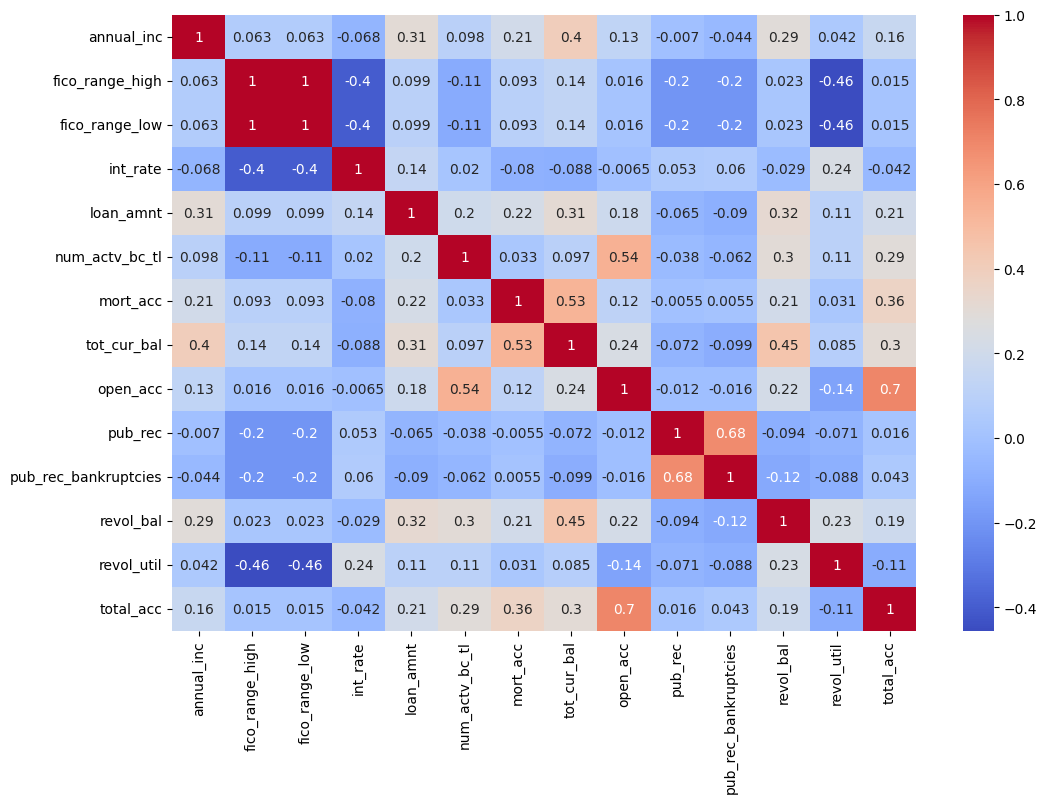

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(data.select_dtypes(include = np.number).corr(), cmap='coolwarm', annot=True)

<Axes: xlabel='emp_length', ylabel='loan_status'>

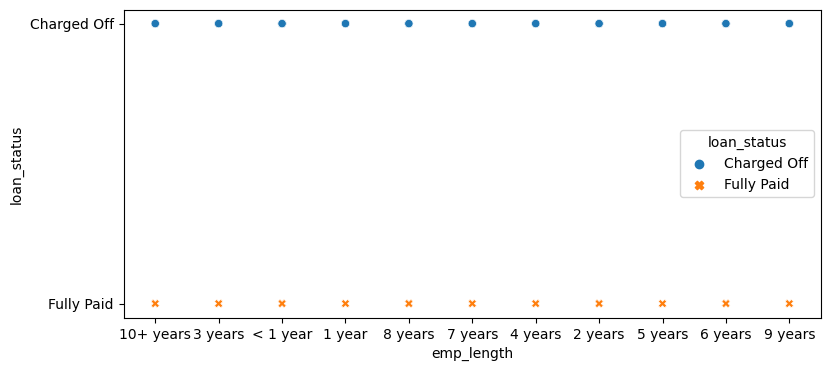

In [ ]:
plt.figure(figsize=(9,4))
categorical_columns = ['emp_length', 'loan_status']
sns.scatterplot(
    x=categorical_columns[0],
    y=categorical_columns[1],
    data=data,
    hue='loan_status',
    style='loan_status',
)




<Axes: xlabel='open_acc', ylabel='num_actv_bc_tl'>

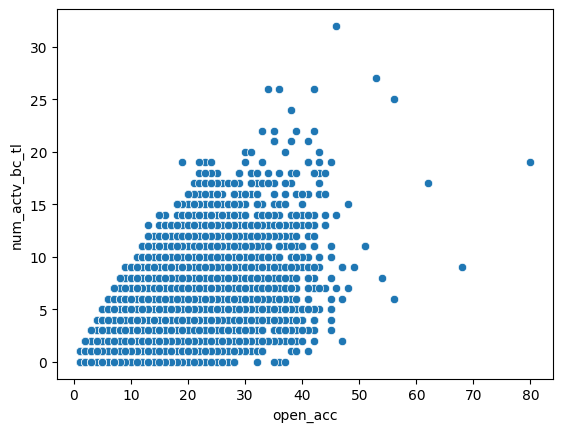

In [ ]:
sns.scatterplot(data=data,x='open_acc',y='num_actv_bc_tl')

<Axes: xlabel='tot_cur_bal', ylabel='mort_acc'>

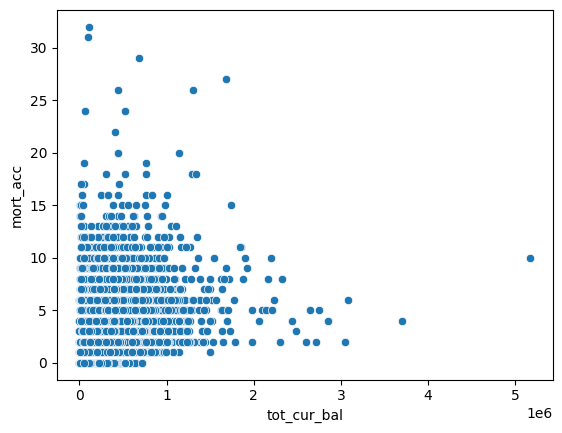

In [ ]:
sns.scatterplot(data=data,x='tot_cur_bal',y='mort_acc')

In [ ]:
#num_actv_bc_tl vs open_account

data.groupby("open_acc")["num_actv_bc_tl"].transform(lambda x: x.fillna(x.mean()))

0         1.0
1         4.0
2         4.0
3         4.0
4        14.0
         ... 
19995     1.0
19996     2.0
19997     2.0
19998     1.0
19999     6.0
Name: num_actv_bc_tl, Length: 100000, dtype: float64

In [ ]:
data.groupby("mort_acc")["tot_cur_bal"].transform(lambda x: x.fillna(x.mean()))

0        319479.0
1         19944.0
2         23199.0
3         72651.0
4         64631.0
           ...   
19995     30397.0
19996    494439.0
19997    284915.0
19998      8205.0
19999     48212.0
Name: tot_cur_bal, Length: 100000, dtype: float64

In [ ]:
data.groupby("tot_cur_bal")["mort_acc"].transform(lambda x: x.fillna(x.mean()))

0        1.0
1        0.0
2        2.0
3        1.0
4        7.0
        ... 
19995    0.0
19996    5.0
19997    4.0
19998    0.0
19999    0.0
Name: mort_acc, Length: 100000, dtype: float64

In [ ]:
#Custom transformer for dealing null values in mor_acc, tot_cur_bal and tot_cur_bal
class mean_null_values(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        # Perform any necessary setup or calculations here based on the input data X
        return self

    def transform(self, X, y=None):
        X = X.copy()

        X.groupby("open_acc")["num_actv_bc_tl"].transform(lambda x: x.fillna(x.mean()))





        return X

In [ ]:
a = Pipeline(steps=[
    ("a",mean_null_values())
])

In [ ]:
b=ColumnTransformer(transformers=[
    ("r",a,['num_actv_bc_tl','open_acc'])
])

In [ ]:
b.fit_transform(data)

array([[ 1.,  7.],
       [ 4.,  5.],
       [ 4.,  7.],
       ...,
       [ 2., 10.],
       [ 1.,  9.],
       [ 6., 13.]])

In [ ]:
#Custom transformer for dealing null values in mor_acc, tot_cur_bal and tot_cur_bal
class tol_cur_bal_mort_acc():
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X_copy = X.copy()
        X_copy['mort_acc']=X_copy.groupby('total_acc')['mort_acc'].transform(lambda x: x.fillna(x.median()))
        X_copy['tot_cur_bal']=X_copy.groupby('mort_acc')['total_acc'].transform(lambda x: x.fillna(x.mean()))

        return X_copy

In [ ]:
x =  Pipeline(steps = [
    ("x", tol_cur_bal_mort_acc())
])

In [ ]:
y = ColumnTransformer(transformers = [
    ('z',x,['total_acc','mort_acc'])
])

In [ ]:
y.fit_transform(data)

array([[ 8.,  1.,  8.],
       [12.,  0., 12.],
       [16.,  2., 16.],
       ...,
       [29.,  4., 29.],
       [19.,  0., 19.],
       [19.,  0., 19.]])

In [ ]:
data.isna().sum()

addr_state                  0
annual_inc                  0
earliest_cr_line            0
emp_length               5846
emp_title                6396
fico_range_high             0
fico_range_low              0
grade                       0
home_ownership              0
application_type            0
initial_list_status         0
int_rate                    0
loan_amnt                   0
num_actv_bc_tl           4959
mort_acc                 3475
tot_cur_bal              4959
open_acc                    0
pub_rec                     0
pub_rec_bankruptcies       42
purpose                     0
revol_bal                   0
revol_util                 66
sub_grade                   0
term                        0
title                    1217
total_acc                   0
verification_status         0
loan_status             20000
dtype: int64

**Outliers**

In [ ]:
'''#Script to find the outliers
for col_name in data.select_dtypes(include=np.number).columns[:-1]:
    print('\n',col_name.title(),'\n')
    q1 = data[col_name].quantile(0.25)
    q3 = data[col_name].quantile(0.75)
    iqr = q3 - q1

    low = q1-1.5*iqr
    high = q3+1.5*iqr
    outliers = data.loc[(data[col_name] < low) | (data[col_name] > high), col_name]
    #print("Outliers are: ",'\n',data.loc[(data[col_name] < low) | (data[col_name] > high), col_name])
    print('lower_bound of ',col_name,' is ', low)
    print('upper_bound of ',col_name,' is ', high)
    print('Outliers on',col_name, 'is',outliers.shape[0])
    print("***********************************************")'''


'#Script to find the outliers\nfor col_name in data.select_dtypes(include=np.number).columns[:-1]:\n    print(\'\n\',col_name.title(),\'\n\')\n    q1 = data[col_name].quantile(0.25)\n    q3 = data[col_name].quantile(0.75)\n    iqr = q3 - q1\n\n    low = q1-1.5*iqr\n    high = q3+1.5*iqr\n    outliers = data.loc[(data[col_name] < low) | (data[col_name] > high), col_name]\n    #print("Outliers are: ",\'\n\',data.loc[(data[col_name] < low) | (data[col_name] > high), col_name])\n    print(\'lower_bound of \',col_name,\' is \', low)\n    print(\'upper_bound of \',col_name,\' is \', high)\n    print(\'Outliers on\',col_name, \'is\',outliers.shape[0])\n    print("***********************************************")'

In [ ]:
#Detecting outlier with z-score
'''outliers=[]
def detect_outlier(data):

    threshold=3
    mean_1 = np.mean(data)
    std_1 = np.std(data)


    for y in data:
        z_score= (y - mean_1)/std_1
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers'''

'outliers=[]\ndef detect_outlier(data):\n\n    threshold=3\n    mean_1 = np.mean(data)\n    std_1 = np.std(data)\n\n\n    for y in data:\n        z_score= (y - mean_1)/std_1\n        if np.abs(z_score) > threshold:\n            outliers.append(y)\n    return outliers'

In [ ]:
'''data.select_dtypes(include=np.number).apply(detect_outlier)'''

'data.select_dtypes(include=np.number).apply(detect_outlier)'

In [ ]:
'''for i in data.select_dtypes(include=np.number).columns:
    print(i)
    Q1=data[i].quantile(0.25)
    Q3=data[i].quantile(0.75)
    IQR=Q3-Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[i] < lower_bound) | (data[i] > upper_bound)]
    print('lower_bound of ',i,' is ', lower_bound)
    print('upper_bound of ',i,' is ', upper_bound)
    print('Outliers on Feature ',i, 'is',outliers.shape[0])
    print("***********************************************")'''

'for i in data.select_dtypes(include=np.number).columns:\n    print(i)\n    Q1=data[i].quantile(0.25)\n    Q3=data[i].quantile(0.75)\n    IQR=Q3-Q1\n    lower_bound = Q1 - 1.5 * IQR\n    upper_bound = Q3 + 1.5 * IQR\n\n    outliers = data[(data[i] < lower_bound) | (data[i] > upper_bound)]\n    print(\'lower_bound of \',i,\' is \', lower_bound)\n    print(\'upper_bound of \',i,\' is \', upper_bound)\n    print(\'Outliers on Feature \',i, \'is\',outliers.shape[0])\n    print("***********************************************")'

# Feature Engineering

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
annual_inc,100000.0,76136.444377,72658.271440,0.00,46000.00,65000.00,90000.00,9522972.00
fico_range_high,100000.0,700.031260,31.741546,664.00,674.00,694.00,714.00,850.00
fico_range_low,100000.0,696.031100,31.740792,660.00,670.00,690.00,710.00,845.00
int_rate,100000.0,13.238209,4.771758,5.31,9.75,12.74,15.99,30.99
loan_amnt,100000.0,14408.428500,8725.405078,750.00,7900.00,12000.00,20000.00,40000.00
num_actv_bc_tl,95041.0,3.630517,2.254231,0.00,2.00,3.00,5.00,32.00
mort_acc,96525.0,1.673670,2.000409,0.00,0.00,1.00,3.00,32.00
tot_cur_bal,95041.0,141509.342999,158672.972347,0.00,29635.00,80928.00,210875.00,5172185.00
open_acc,100000.0,11.603230,5.488242,1.00,8.00,11.00,14.00,80.00
pub_rec,100000.0,0.214940,0.577671,0.00,0.00,0.00,0.00,24.00


In [ ]:
data.head(5)

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,...,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status,loan_status
0,CO,85000.0,Jul-1997,10+ years,Deputy,744.0,740.0,E,MORTGAGE,Individual,...,0.0,debt_consolidation,5338.0,93.6,E1,60 months,Debt consolidation,8.0,Source Verified,Charged Off
1,CA,40000.0,Apr-1987,10+ years,Department of Veterans Affairs,724.0,720.0,B,RENT,Individual,...,0.0,debt_consolidation,19944.0,60.3,B1,36 months,Credit Loan,12.0,Verified,Fully Paid
2,FL,60000.0,Aug-2007,10+ years,Marble polishing,679.0,675.0,B,MORTGAGE,Individual,...,0.0,debt_consolidation,23199.0,88.5,B5,36 months,Debt consolidation,16.0,Source Verified,Fully Paid
3,IL,100742.0,Sep-1980,10+ years,printer,664.0,660.0,B,MORTGAGE,Individual,...,0.0,debt_consolidation,18425.0,69.0,B2,36 months,Debt consolidation,19.0,Source Verified,Fully Paid
4,MD,80000.0,Jul-1999,10+ years,Southern Mgmt,669.0,665.0,F,RENT,Individual,...,0.0,debt_consolidation,34370.0,90.0,F5,60 months,Debt Connsolidation,59.0,Verified,Fully Paid


In [ ]:
#data_eda['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'])
#data_eda['earliest_cr_line_Month'] = data_eda['earliest_cr_line'].dt.month
#data_eda['earliest_cr_line_Year'] = data_eda['earliest_cr_line'].dt.year
#data_eda.drop(columns='earliest_cr_line',inplace=True)

#data_eda['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'])
#data_eda['earliest_cr_line_Month'] = data_eda['earliest_cr_line'].dt.month
#data_eda['earliest_cr_line_Year'] = data_eda['earliest_cr_line'].dt.year
#data_eda.drop(columns='earliest_cr_line',inplace=True)
#data_eda["emp_length_new"]=data_eda["emp_length"].astype(str).apply(lambda text: int(re.search(r'\d+', text).group()) if re.search(r'\d+', text) else None)
#data_eda.drop(columns='emp_length',inplace=True)

#data_eda['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'])
#data_eda['earliest_cr_line_Month'] = data_eda['earliest_cr_line'].dt.month
#data_eda['earliest_cr_line_Year'] = data_eda['earliest_cr_line'].dt.year
#data_eda.drop(columns='earliest_cr_line',inplace=True)
#data_eda["emp_length_new"]=data_eda["emp_length"].astype(str).apply(lambda text: int(re.search(r'\d+', text).group()) if re.search(r'\d+', text) else None)
#data_eda.drop(columns='emp_length',inplace=True)
#data_eda['term_modified'] = data_eda["term"].apply(lambda x: x.split(" ")[1])
#data_eda.drop(columns = 'term', inplace=True)
#data_eda['emp_title_modified']=data_eda['emp_title'].astype(str).apply(lambda s: re.sub(r'[^\w\s]', '', s) )
#data_eda.drop(columns='emp_title',inplace=True)

In [ ]:
data["term"]

0         60 months
1         36 months
2         36 months
3         36 months
4         60 months
            ...    
19995     36 months
19996     60 months
19997     36 months
19998     36 months
19999     60 months
Name: term, Length: 100000, dtype: object

In [ ]:
data["term"].astype(str).apply(lambda x:x[:3])

0         60
1         36
2         36
3         36
4         60
        ... 
19995     36
19996     60
19997     36
19998     36
19999     60
Name: term, Length: 100000, dtype: object

In [ ]:
class Emp_Length_Term(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        # Perform any necessary setup or calculations here based on the input data X
        return self

    def transform(self, X, y=None):
        X = X.copy()

        X['term']=X['term'].astype(str).apply(lambda x: x[:3])
        #X['term']=X['term'].astype(int)



        #X['emp_title'] = X['emp_title'].astype(str).apply(lambda s: re.sub(r'[^\w\s]', '', s))


        # X = X.drop(columns=['earliest_cr_line', 'emp_length', 'emp_title'])

        return X


In [ ]:
p=Pipeline(steps=[
    ("ear_line",Emp_Length_Term())
])

In [ ]:

c=ColumnTransformer(transformers=[
    ("ear_line_test",p,['term'])
])

In [ ]:
c.fit_transform(data)

array([[' 60'],
       [' 36'],
       [' 36'],
       ...,
       [' 36'],
       [' 36'],
       [' 60']], dtype=object)

In [ ]:
data["earliest_cr_line"]

0        Jul-1997
1        Apr-1987
2        Aug-2007
3        Sep-1980
4        Jul-1999
           ...   
19995    Sep-2010
19996    Dec-1998
19997    May-1996
19998    Mar-2003
19999    Apr-1994
Name: earliest_cr_line, Length: 100000, dtype: object

In [ ]:
class earliest_cr_line(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X_copy = X.copy()

        X_copy['earliest_cr_line'] = pd.to_datetime(X_copy['earliest_cr_line'])
        X_copy['earliest_cr_line'] = X_copy['earliest_cr_line'].dt.year



        return X_copy

In [ ]:

p=Pipeline(steps=[
    ("x",earliest_cr_line())
])

In [ ]:

c=ColumnTransformer(transformers=[
    ("s",p,['earliest_cr_line'])
])

In [ ]:
c.fit_transform(data)

array([[1997],
       [1987],
       [2007],
       ...,
       [1996],
       [2003],
       [1994]])

In [ ]:
class verification_status():
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X_copy = X.copy()
        X_copy['verification_status']=X_copy["verification_status"].str.replace("Source Verified","Verified")
        return X_copy

In [ ]:
pipeline_num=Pipeline(steps=[
    ("earliest_cr_line",earliest_cr_line()),
	  ("term",Emp_Length_Term()),
    ("num_actv_bc_tl",mean_null_values()),
    ("mort_acc_total_bal",tol_cur_bal_mort_acc()),
    ("impute",SimpleImputer(strategy='median')),
    ("scale",StandardScaler())
])

In [ ]:
num_cols = ['earliest_cr_line','annual_inc', 'fico_range_high', 'fico_range_low', 'int_rate',
       'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'open_acc',
       'pub_rec', 'pub_rec_bankruptcies', 'revol_bal', 'revol_util',
       'total_acc','term'
          ]

In [ ]:
t=ColumnTransformer(transformers=[
    ("pipe",pipeline_num,['earliest_cr_line','annual_inc', 'fico_range_high', 'fico_range_low', 'int_rate',
       'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'open_acc',
       'pub_rec', 'pub_rec_bankruptcies', 'revol_bal', 'revol_util',
       'total_acc','term'
          ])
])

In [ ]:
t

ColumnTransformer(transformers=[('pipe',
                                 Pipeline(steps=[('earliest_cr_line',
                                                  earliest_cr_line()),
                                                 ('term', Emp_Length_Term()),
                                                 ('num_actv_bc_tl',
                                                  mean_null_values()),
                                                 ('mort_acc_total_bal',
                                                  <__main__.tol_cur_bal_mort_acc object at 0x780f9ea15120>),
                                                 ('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scale', StandardScaler())]),
                                 ['earliest_cr_line', 'annual_inc',
                                  'fico_range_high', 'fico_range_low',
                                  'int_rate', 'loan_amnt', 'num_actv_bc_tl',
                                  'mort_acc', 'tot_cur_bal', 'open_acc',
                                  'pub_rec', 'pub_rec_bankruptcies',
                                  'revol_bal', 'revol_util', 'total_acc',
                                  'term'])])

In [ ]:
 b = pipeline_num.fit_transform(data[num_cols])

In [ ]:
c = pd.DataFrame(b , columns = num_cols)

In [ ]:
c

,earliest_cr_line,annual_inc,fico_range_high,fico_range_low,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,pub_rec,pub_rec_bankruptcies,revol_bal,revol_util,total_acc,term
0,-0.223504,0.121990,1.385218,1.385256,1.205388,0.420220,-1.180472,-0.328843,-1.416304,-0.838748,-0.372082,-0.356039,-0.485673,1.703780,-1.416304,1.777515
1,-1.538158,-0.497350,0.755126,0.755149,-0.645092,-0.642773,0.182004,-0.834898,-1.083721,-1.203165,-0.372082,-0.356039,0.163353,0.344463,-1.083721,-0.562583
2,1.091150,-0.222088,-0.662582,-0.662592,-0.370559,0.411624,0.182004,0.177213,-0.751137,-0.838748,-0.372082,-0.356039,0.307990,1.495596,-0.751137,-0.562583
3,-2.458416,0.338649,-1.135151,-1.135173,-0.854660,0.640841,0.182004,-0.328843,-0.501699,0.072295,-0.372082,-0.356039,0.095855,0.699600,-0.501699,-0.562583
4,0.039426,0.053175,-0.977628,-0.977646,2.219694,2.359968,4.723590,2.707491,2.824138,2.076590,-0.372082,-0.356039,0.804380,1.556827,2.824138,1.777515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.485546,-0.517995,-0.662582,-0.662592,0.907802,-0.505243,-1.180472,-0.834898,-1.250012,-0.292122,-0.372082,-0.356039,-0.464433,0.332217,-1.250012,-0.562583
99996,-0.092039,0.053175,-0.820105,-0.820119,1.190718,0.454603,-0.726313,1.695380,0.412906,-0.474331,-0.372082,-0.356039,-0.105838,0.948604,0.412906,1.777515
99997,-0.354970,0.259622,0.912649,0.912676,-0.422951,2.359968,-0.726313,1.189324,0.329760,-0.292122,-0.372082,-0.356039,1.195235,0.360791,0.329760,-0.562583
99998,0.565288,-0.566166,3.433018,3.433104,-1.120810,-1.078285,-1.180472,-0.834898,-0.501699,-0.474331,-0.372082,-0.356039,-0.673547,-1.937393,-0.501699,-0.562583


In [ ]:
cat_cols=["home_ownership","application_type","initial_list_status","purpose","sub_grade","verification_status"]


In [ ]:
pipeline_cat=Pipeline(steps=[
    ("ver",verification_status()),
    ("ohe",OneHotEncoder(sparse=False,drop='first'))
])

In [ ]:
t=ColumnTransformer(transformers=[
    ("pipe",pipeline_cat,["home_ownership","application_type","initial_list_status","purpose","sub_grade","verification_status"
          ])
])

In [ ]:
pipeline_cat.fit_transform(data[cat_cols])

array([[1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.]])

In [ ]:
prepocess=ColumnTransformer(transformers=[
    ("num",pipeline_num,num_cols),
    ("cat",pipeline_cat,cat_cols)
])

In [ ]:
pipeline_full = Pipeline(steps=[
    ("final",prepocess)
])

In [ ]:
pipeline_full

Pipeline(steps=[('final',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('earliest_cr_line',
                                                                   earliest_cr_line()),
                                                                  ('term',
                                                                   Emp_Length_Term()),
                                                                  ('num_actv_bc_tl',
                                                                   mean_null_values()),
                                                                  ('mort_acc_total_bal',
                                                                   <__main__.tol_cur_bal_mort_acc object at 0x780f9ea15120>),
                                                                  ('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['earliest_cr_l...
                                                   'tot_cur_bal', 'open_acc',
                                                   'pub_rec',
                                                   'pub_rec_bankruptcies',
                                                   'revol_bal', 'revol_util',
                                                   'total_acc', 'term']),
                                                 ('cat',
                                                  Pipeline(steps=[('ver',
                                                                   <__main__.verification_status object at 0x780f97cccdc0>),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False,
                                                                                 sparse_output=False))]),
                                                  ['home_ownership',
                                                   'application_type',
                                                   'initial_list_status',
                                                   'purpose', 'sub_grade',
                                                   'verification_status'])]))])

In [ ]:
pipeline_full.fit_transform(data)

array([[-0.22350432,  0.12199024,  1.38521797, ...,  0.        ,
         0.        ,  1.        ],
       [-1.5381583 , -0.49735046,  0.75512579, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.09114966, -0.22208793, -0.66258163, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.35496972,  0.25962151,  0.91264883, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.56528807, -0.5661661 ,  3.43301757, ...,  0.        ,
         0.        ,  0.        ],
       [-0.61790052, -0.62534754, -1.13515077, ...,  0.        ,
         0.        ,  1.        ]])

In [ ]:
test=pd.DataFrame(pipeline_full.fit_transform(data))

In [ ]:
test.head(1)

,0,1,2,3,4,5,6,7,8,9,...,61,62,63,64,65,66,67,68,69,70
0,-0.223504,0.12199,1.385218,1.385256,1.205388,0.42022,-1.180472,-0.328843,-1.416304,-0.838748,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
pipeline_mdl = Pipeline([
    ("preprocess",pipeline_full),

])

In [ ]:
data["loan_status"]

0        Charged Off
1         Fully Paid
2         Fully Paid
3         Fully Paid
4         Fully Paid
            ...     
19995            NaN
19996            NaN
19997            NaN
19998            NaN
19999            NaN
Name: loan_status, Length: 100000, dtype: object

In [ ]:
train[['loan_status']]=train[['loan_status']].replace({"Charged Off":1,"Fully Paid":0})

In [ ]:
X=train.drop(columns='loan_status')
y=train[['loan_status']].fillna(train["loan_status"].mode()[0])

In [ ]:
y

,loan_status
0,1
1,0
2,0
3,0
4,0
...,...
79995,1
79996,0
79997,0
79998,0


In [ ]:
ros = RandomOverSampler(random_state=42)

In [ ]:
X_,y_ = ros.fit_resample(X,y)

In [ ]:
y_.value_counts()

loan_status
0              64030
1              64030
dtype: int64

In [ ]:
train_X, test_X, train_y,test_y = train_test_split(X_,y_,test_size=0.2,random_state=42)

In [ ]:
pipeline_mdl.fit(train_X,train_y)

Pipeline(steps=[('preprocess',
                 Pipeline(steps=[('final',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('earliest_cr_line',
                                                                                    earliest_cr_line()),
                                                                                   ('term',
                                                                                    Emp_Length_Term()),
                                                                                   ('num_actv_bc_tl',
                                                                                    mean_null_values()),
                                                                                   ('mort_acc_total_bal',
                                                                                    <__main__.tol_cur_bal_mort_acc object at 0x780f9ea15120>),
                                                                                   ('impute',
                                                                                    SimpleImputer(strategy='median')),
                                                                                   ('scale',
                                                                                    Stand...
                                                                    'open_acc',
                                                                    'pub_rec',
                                                                    'pub_rec_bankruptcies',
                                                                    'revol_bal',
                                                                    'revol_util',
                                                                    'total_acc',
                                                                    'term']),
                                                                  ('cat',
                                                                   Pipeline(steps=[('ver',
                                                                                    <__main__.verification_status object at 0x780f97cccdc0>),
                                                                                   ('ohe',
                                                                                    OneHotEncoder(drop='first',
                                                                                                  sparse=False,
                                                                                                  sparse_output=False))]),
                                                                   ['home_ownership',
                                                                    'application_type',
                                                                    'initial_list_status',
                                                                    'purpose',
                                                                    'sub_grade',
                                                                    'verification_status'])]))]))])

In [ ]:
'''pipe_lr = Pipeline([
    ('preprocess',pipeline_mdl),
    ('lr',LogisticRegression())
])

pipe_dt = Pipeline([
    ('preprocess',pipeline_mdl),
    ('dt',DecisionTreeClassifier())
])

pipe_knn = Pipeline([
    ('preprocess',pipeline_mdl),
    ('knn',KNeighborsClassifier())
])

pipe_rf = Pipeline([
    ('preprocess',pipeline_mdl),
    ('rf',RandomForestClassifier())
])'''

"pipe_lr = Pipeline([\n    ('preprocess',pipeline_mdl),\n    ('lr',LogisticRegression())\n])\n\npipe_dt = Pipeline([\n    ('preprocess',pipeline_mdl),\n    ('dt',DecisionTreeClassifier())\n])\n\npipe_knn = Pipeline([\n    ('preprocess',pipeline_mdl),\n    ('knn',KNeighborsClassifier())\n])\n\npipe_rf = Pipeline([\n    ('preprocess',pipeline_mdl),\n    ('rf',RandomForestClassifier())\n])"

In [ ]:
'''grid_param_lr = [{'lr__penalty':['l2']}]
grid_param_knn = [{'knn__n_neighbors':[10,15]}]
grid_param_dt = [{'dt__max_depth':[5,10]}]
grid_param_rf = [{'rf__max_depth':[5,10]}]'''

"grid_param_lr = [{'lr__penalty':['l2']}]\ngrid_param_knn = [{'knn__n_neighbors':[10,15]}]\ngrid_param_dt = [{'dt__max_depth':[5,10]}]\ngrid_param_rf = [{'rf__max_depth':[5,10]}]"

In [ ]:
# GridSearchCV
'''gridsrc_lr = GridSearchCV(pipe_lr, param_grid=grid_param_lr, scoring='r2', cv=2)
gridsrc_knn = GridSearchCV(pipe_knn, param_grid=grid_param_knn, scoring='r2', cv=2)
gridsrc_dt = GridSearchCV(pipe_dt, param_grid=grid_param_dt, scoring='r2', cv=2)
gridsrc_rf = GridSearchCV(pipe_rf, param_grid=grid_param_rf, scoring='r2', cv=2)'''

"gridsrc_lr = GridSearchCV(pipe_lr, param_grid=grid_param_lr, scoring='r2', cv=2)\ngridsrc_knn = GridSearchCV(pipe_knn, param_grid=grid_param_knn, scoring='r2', cv=2)\ngridsrc_dt = GridSearchCV(pipe_dt, param_grid=grid_param_dt, scoring='r2', cv=2)\ngridsrc_rf = GridSearchCV(pipe_rf, param_grid=grid_param_rf, scoring='r2', cv=2)"

In [ ]:
'''result_acc = {}
models = []
iter_mdl = [gridsrc_lr,  gridsrc_knn, gridsrc_dt, gridsrc_rf]
mdl_idx = {0:'Log_reg', 1:'Knn', 2:'DecisionTree', 3:'RandomForest'}

for id, model in enumerate(iter_mdl):
  model.fit(train_X, train_y)
  print(model.best_params_)
  print(model.best_score_)

  models.append(model.best_estimator_)
  result_acc[id] = model.best_score_'''

"result_acc = {}\nmodels = []\niter_mdl = [gridsrc_lr,  gridsrc_knn, gridsrc_dt, gridsrc_rf]\nmdl_idx = {0:'Log_reg', 1:'Knn', 2:'DecisionTree', 3:'RandomForest'}\n\nfor id, model in enumerate(iter_mdl):\n  model.fit(train_X, train_y)\n  print(model.best_params_)\n  print(model.best_score_)\n\n  models.append(model.best_estimator_)\n  result_acc[id] = model.best_score_"

In [ ]:
pipe_lr = Pipeline([
    ('preprocess',pipeline_mdl),
    ('lr',LogisticRegression())
])

pipe_dt = Pipeline([
    ('preprocess',pipeline_mdl),
    ('dt',DecisionTreeClassifier())
])

pipe_knn = Pipeline([
    ('preprocess',pipeline_mdl),
    ('knn',KNeighborsClassifier())
])

pipe_rf = Pipeline([
    ('preprocess',pipeline_mdl),
    ('rf',RandomForestClassifier())
])
pipe_knn = Pipeline([
    ('preprocess',pipeline_mdl),
    ('rf',KNeighborsClassifier())
])

In [ ]:
pipe_lr.fit(train_X,train_y)

Pipeline(steps=[('preprocess',
                 Pipeline(steps=[('preprocess',
                                  Pipeline(steps=[('final',
                                                   ColumnTransformer(transformers=[('num',
                                                                                    Pipeline(steps=[('earliest_cr_line',
                                                                                                     earliest_cr_line()),
                                                                                                    ('term',
                                                                                                     Emp_Length_Term()),
                                                                                                    ('num_actv_bc_tl',
                                                                                                     mean_null_values()),
                                                                                                    ('mort_acc_total_bal',
                                                                                                     <__main__.tol_cur_bal_mort_acc object at 0x780f9ea15120>),
                                                                                                    ('impute',
                                                                                                     SimpleImputer(stra...
                                                                                     'pub_rec_bankruptcies',
                                                                                     'revol_bal',
                                                                                     'revol_util',
                                                                                     'total_acc',
                                                                                     'term']),
                                                                                   ('cat',
                                                                                    Pipeline(steps=[('ver',
                                                                                                     <__main__.verification_status object at 0x780f97cccdc0>),
                                                                                                    ('ohe',
                                                                                                     OneHotEncoder(drop='first',
                                                                                                                   sparse=False,
                                                                                                                   sparse_output=False))]),
                                                                                    ['home_ownership',
                                                                                     'application_type',
                                                                                     'initial_list_status',
                                                                                     'purpose',
                                                                                     'sub_grade',
                                                                                     'verification_status'])]))]))])),
                ('lr', LogisticRegression())])

In [ ]:
 pred_val_y = pipe_lr.predict(test_X)

In [ ]:
print('val log_loss:', log_loss(test_y, pred_val_y))
print('val accuracy_score:', accuracy_score(test_y, pred_val_y))
print('val conf.matrix: \n', confusion_matrix(test_y, pred_val_y))
print('val classification: \n', classification_report(test_y, pred_val_y))

val log_loss: 12.707878732770883
val accuracy_score: 0.6474308917694831
val conf.matrix: 
 [[8013 4917]
 [4113 8569]]
val classification: 
               precision    recall  f1-score   support

           0       0.66      0.62      0.64     12930
           1       0.64      0.68      0.65     12682

    accuracy                           0.65     25612
   macro avg       0.65      0.65      0.65     25612
weighted avg       0.65      0.65      0.65     25612



In [ ]:
pipe_dt.fit(train_X,train_y)

Pipeline(steps=[('preprocess',
                 Pipeline(steps=[('preprocess',
                                  Pipeline(steps=[('final',
                                                   ColumnTransformer(transformers=[('num',
                                                                                    Pipeline(steps=[('earliest_cr_line',
                                                                                                     earliest_cr_line()),
                                                                                                    ('term',
                                                                                                     Emp_Length_Term()),
                                                                                                    ('num_actv_bc_tl',
                                                                                                     mean_null_values()),
                                                                                                    ('mort_acc_total_bal',
                                                                                                     <__main__.tol_cur_bal_mort_acc object at 0x780f9ea15120>),
                                                                                                    ('impute',
                                                                                                     SimpleImputer(stra...
                                                                                     'pub_rec_bankruptcies',
                                                                                     'revol_bal',
                                                                                     'revol_util',
                                                                                     'total_acc',
                                                                                     'term']),
                                                                                   ('cat',
                                                                                    Pipeline(steps=[('ver',
                                                                                                     <__main__.verification_status object at 0x780f97cccdc0>),
                                                                                                    ('ohe',
                                                                                                     OneHotEncoder(drop='first',
                                                                                                                   sparse=False,
                                                                                                                   sparse_output=False))]),
                                                                                    ['home_ownership',
                                                                                     'application_type',
                                                                                     'initial_list_status',
                                                                                     'purpose',
                                                                                     'sub_grade',
                                                                                     'verification_status'])]))]))])),
                ('dt', DecisionTreeClassifier())])

In [ ]:
pred_val_dt_y = pipe_dt.predict(test_X)
print('val log_loss:', log_loss(test_y, pred_val_dt_y))
print('val accuracy_score:', accuracy_score(test_y, pred_val_dt_y))
print('val conf.matrix: \n', confusion_matrix(test_y, pred_val_dt_y))
print('val classification: \n', classification_report(test_y, pred_val_dt_y))

val log_loss: 4.455497681943812
val accuracy_score: 0.8763860690301422
val conf.matrix: 
 [[10065  2865]
 [  301 12381]]
val classification: 
               precision    recall  f1-score   support

           0       0.97      0.78      0.86     12930
           1       0.81      0.98      0.89     12682

    accuracy                           0.88     25612
   macro avg       0.89      0.88      0.88     25612
weighted avg       0.89      0.88      0.88     25612



In [ ]:
pipe_knn.fit(train_X,train_y)

Pipeline(steps=[('preprocess',
                 Pipeline(steps=[('preprocess',
                                  Pipeline(steps=[('final',
                                                   ColumnTransformer(transformers=[('num',
                                                                                    Pipeline(steps=[('earliest_cr_line',
                                                                                                     earliest_cr_line()),
                                                                                                    ('term',
                                                                                                     Emp_Length_Term()),
                                                                                                    ('num_actv_bc_tl',
                                                                                                     mean_null_values()),
                                                                                                    ('mort_acc_total_bal',
                                                                                                     <__main__.tol_cur_bal_mort_acc object at 0x780f9ea15120>),
                                                                                                    ('impute',
                                                                                                     SimpleImputer(stra...
                                                                                     'pub_rec_bankruptcies',
                                                                                     'revol_bal',
                                                                                     'revol_util',
                                                                                     'total_acc',
                                                                                     'term']),
                                                                                   ('cat',
                                                                                    Pipeline(steps=[('ver',
                                                                                                     <__main__.verification_status object at 0x780f97cccdc0>),
                                                                                                    ('ohe',
                                                                                                     OneHotEncoder(drop='first',
                                                                                                                   sparse=False,
                                                                                                                   sparse_output=False))]),
                                                                                    ['home_ownership',
                                                                                     'application_type',
                                                                                     'initial_list_status',
                                                                                     'purpose',
                                                                                     'sub_grade',
                                                                                     'verification_status'])]))]))])),
                ('rf', KNeighborsClassifier())])

In [ ]:
pred_val_knn_y = pipe_dt.predict(test_X)
print('val log_loss:', log_loss(test_y, pred_val_knn_y))
print('val accuracy_score:', accuracy_score(test_y, pred_val_knn_y))
print('val conf.matrix: \n', confusion_matrix(test_y, pred_val_knn_y))
print('val classification: \n', classification_report(test_y, pred_val_knn_y))

val log_loss: 4.455497681943812
val accuracy_score: 0.8763860690301422
val conf.matrix: 
 [[10065  2865]
 [  301 12381]]
val classification: 
               precision    recall  f1-score   support

           0       0.97      0.78      0.86     12930
           1       0.81      0.98      0.89     12682

    accuracy                           0.88     25612
   macro avg       0.89      0.88      0.88     25612
weighted avg       0.89      0.88      0.88     25612



In [ ]:
pipe_rf.fit(train_X,train_y)

Pipeline(steps=[('preprocess',
                 Pipeline(steps=[('preprocess',
                                  Pipeline(steps=[('final',
                                                   ColumnTransformer(transformers=[('num',
                                                                                    Pipeline(steps=[('earliest_cr_line',
                                                                                                     earliest_cr_line()),
                                                                                                    ('term',
                                                                                                     Emp_Length_Term()),
                                                                                                    ('num_actv_bc_tl',
                                                                                                     mean_null_values()),
                                                                                                    ('mort_acc_total_bal',
                                                                                                     <__main__.tol_cur_bal_mort_acc object at 0x780f9ea15120>),
                                                                                                    ('impute',
                                                                                                     SimpleImputer(stra...
                                                                                     'pub_rec_bankruptcies',
                                                                                     'revol_bal',
                                                                                     'revol_util',
                                                                                     'total_acc',
                                                                                     'term']),
                                                                                   ('cat',
                                                                                    Pipeline(steps=[('ver',
                                                                                                     <__main__.verification_status object at 0x780f97cccdc0>),
                                                                                                    ('ohe',
                                                                                                     OneHotEncoder(drop='first',
                                                                                                                   sparse=False,
                                                                                                                   sparse_output=False))]),
                                                                                    ['home_ownership',
                                                                                     'application_type',
                                                                                     'initial_list_status',
                                                                                     'purpose',
                                                                                     'sub_grade',
                                                                                     'verification_status'])]))]))])),
                ('rf', RandomForestClassifier())])

In [ ]:
pred_val_rf_y = pipe_dt.predict(test_X)
print('val log_loss:', log_loss(test_y, pred_val_rf_y))
print('val accuracy_score:', accuracy_score(test_y, pred_val_rf_y))
print('val conf.matrix: \n', confusion_matrix(test_y, pred_val_rf_y))
print('val classification: \n', classification_report(test_y, pred_val_rf_y))

val log_loss: 4.455497681943812
val accuracy_score: 0.8763860690301422
val conf.matrix: 
 [[10065  2865]
 [  301 12381]]
val classification: 
               precision    recall  f1-score   support

           0       0.97      0.78      0.86     12930
           1       0.81      0.98      0.89     12682

    accuracy                           0.88     25612
   macro avg       0.89      0.88      0.88     25612
weighted avg       0.89      0.88      0.88     25612



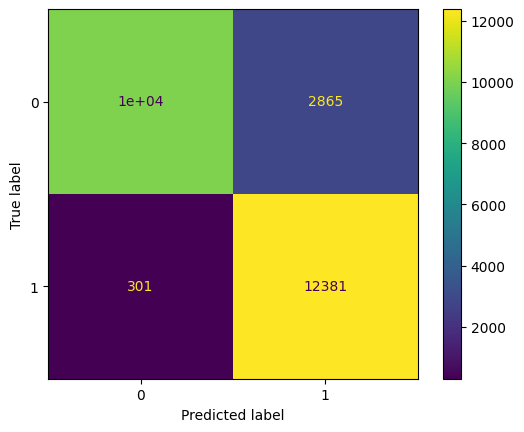

In [ ]:
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(test_y,pred_val_rf_y)

In [ ]:
pipe_lr = Pipeline([
    ('preprocess',pipeline_mdl),
    ('lr',LogisticRegression())
])

pipe_dt = Pipeline([
    ('preprocess',pipeline_mdl),
    ('dt',DecisionTreeClassifier())
])

pipe_knn = Pipeline([
    ('preprocess',pipeline_mdl),
    ('knn',KNeighborsClassifier())
])

pipe_rf = Pipeline([
    ('preprocess',pipeline_mdl),
    ('rf',RandomForestClassifier())
])

pipe_nb = Pipeline([
    ('preprocess',pipeline_mdl),
    ('rf',GaussianNB())
])

pipe_adaboost = Pipeline([
    ('preprocess',pipeline_mdl),
    ('rf',AdaBoostClassifier())
])
pipe_gbm = Pipeline([
    ('preprocess',pipeline_mdl),
    ('rf',GradientBoostingClassifier())
])
pipe_xgb = Pipeline([
    ('preprocess',pipeline_mdl),
    ('rf',xgb.XGBClassifier())
])

pipe_voting_hard = Pipeline([
    ('preprocess',pipeline_mdl),
    ('rf',VotingClassifier(estimators=[('lr', LogisticRegression()),
                                                ('rf', RandomForestClassifier()),
                                                ('gmb', GradientBoostingClassifier())],
                                    voting='hard'))
])

pipe_voting_soft = Pipeline([
    ('preprocess',pipeline_mdl),
    ('rf',VotingClassifier(estimators=[('lr', LogisticRegression()),
                                                ('rf', RandomForestClassifier()),
                                                ('gmb', GradientBoostingClassifier())],
                                    voting='soft'))
])


pipe_voting_soft_best_model = Pipeline([
    ('preprocess',pipeline_mdl),
    ('rf',VotingClassifier(estimators=[('xgb', xgb.XGBClassifier()),
                                                ('rf', RandomForestClassifier()),
                                                ('gmb', GradientBoostingClassifier())],
                                    voting='soft'))
])


pipe_Stacking = Pipeline([
    ('preprocess',pipeline_mdl),
    ('rf', StackingClassifier(estimators=[('lr', LogisticRegression()),
                                                ('rf', RandomForestClassifier()),
                                                ('gmb', GradientBoostingClassifier())],
                                     final_estimator=LogisticRegression()))

])



pipe_Stacking_best_model1 = Pipeline([
    ('preprocess',pipeline_mdl),
    ('rf', StackingClassifier(estimators=[('xgb', xgb.XGBClassifier()),
                                                ('rf', RandomForestClassifier()),
                                                ('gmb', GradientBoostingClassifier())],
                                     final_estimator=DecisionTreeClassifier()))

])




pipe_Stacking_best_model_best_final_estimator = Pipeline([
    ('preprocess',pipeline_mdl),
    ('rf', StackingClassifier(estimators=[('xgb', xgb.XGBClassifier()),
                                                ('rf', RandomForestClassifier()),
                                                ('gmb', GradientBoostingClassifier())],
                                     final_estimator=RandomForestClassifier()))




])








In [ ]:
model_ = {'Logistic': pipe_lr,
         'KNN': pipe_knn,
         'Naive Bayes': pipe_nb,
         'Decision Tree': pipe_dt,
         'RandomForest': pipe_rf,
         'AdaBoost': pipe_adaboost,
         'GBM': pipe_gbm,
         'Xgboost': pipe_xgb,
         'Voting_hard': pipe_voting_hard,
         'Voting_soft': pipe_voting_soft,
         'Voting_soft_best_model': pipe_voting_soft_best_model,
         'Stacking': pipe_Stacking,
         #'Stacking_best_model': pipe_Stacking_best_model,
         'Stacking_best_model_best_final_estimator':pipe_Stacking_best_model_best_final_estimator


        }

In [ ]:
res = []
for name, model in model_.items():
    print("Model : ",name)
    model.fit(train_X,train_y)
    train_pred = model.predict(train_X)
    test_pred = model.predict(test_X)
    print("Train Accuracy : ",accuracy_score(train_y, train_pred))
    print("Test Accuracy : ",accuracy_score(test_y, test_pred))
    print("Train Confusion Matrix : ",confusion_matrix(train_y, train_pred))
    print("Test Confusion Matrix : ",confusion_matrix(test_y, test_pred))
    print("Train Classification Report : ",classification_report(train_y, train_pred))
    print("Test Classification Report : ",classification_report(test_y, test_pred))
    res.append([name,accuracy_score(train_y, train_pred), accuracy_score(test_y, test_pred)])

Model :  Logistic
Train Accuracy :  0.652409027018585
Test Accuracy :  0.6474308917694831
Train Confusion Matrix :  [[32010 19090]
 [16520 34828]]
Test Confusion Matrix :  [[8013 4917]
 [4113 8569]]
Train Classification Report :                precision    recall  f1-score   support

           0       0.66      0.63      0.64     51100
           1       0.65      0.68      0.66     51348

    accuracy                           0.65    102448
   macro avg       0.65      0.65      0.65    102448
weighted avg       0.65      0.65      0.65    102448

Test Classification Report :                precision    recall  f1-score   support

           0       0.66      0.62      0.64     12930
           1       0.64      0.68      0.65     12682

    accuracy                           0.65     25612
   macro avg       0.65      0.65      0.65     25612
weighted avg       0.65      0.65      0.65     25612

Model :  KNN
Train Accuracy :  0.8295037482430111
Test Accuracy :  0.7300093706075277


In [ ]:
final_res = pd.DataFrame(res, columns=['Model','Train Accuracy','Test Accuracy'])

In [ ]:
final_res

,Model,Train Accuracy,Test Accuracy
0,Logistic,0.652409,0.647431
1,KNN,0.829504,0.730009
2,Naive Bayes,0.642170,0.641340
3,Decision Tree,1.000000,0.877987
4,RandomForest,1.000000,0.948266
5,AdaBoost,0.652419,0.646455
6,GBM,0.665186,0.659222
7,Xgboost,0.764808,0.720990
8,Voting_hard,0.695289,0.689247
9,Voting_soft,0.925328,0.835819
